Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json 
import matplotlib.pyplot as plt

Constants

In [2]:
VHT_LINE_COST = 1000000 #Euros
HT_LINE_COST = 300000 #Euros
TRANSFORMER_COST = 500000 #Euros

VHT_VOLTAGE = 400000
HT_VOLTAGE = 90000

Plants Data

In [3]:
df_plants = pd.read_excel("plants_table.xlsx")
df_plants.index += 1
df_plants = pd.DataFrame(df_plants)
df_plants

,Plants,x,y,production (MW)
1,C1,300,100,900
2,C2,600,100,500
3,C3,700,200,1200
4,C4,900,700,450
5,C5,500,500,750
6,C6,400,900,1200


Cities Data

In [4]:
df_cities = pd.read_excel("cities_table.xlsx")
df_cities.index += 1
df_cities = pd.DataFrame(df_cities)
df_cities

,City,x,y,consumption (MW)
1,V1,150,100,200
2,V2,400,80,300
3,V3,950,70,200
4,V4,30,120,250
5,V5,600,300,300
6,V6,20,450,250
7,V7,300,500,300
8,V8,950,450,300
9,V9,70,800,250
10,V10,350,750,150


Plant and City Network

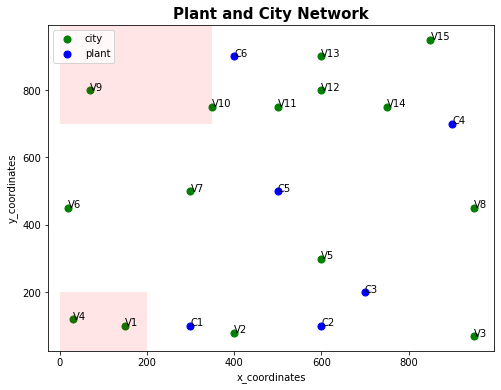

In [5]:
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt, patches
import numpy as np
import matplotlib.pyplot as plt
x_cityPoints, y_cityPoints, x_plantPoints, y_plantPoints= np.array(df_cities['x']), np.array(df_cities['y']), np.array(df_plants['x']), np.array(df_plants['y'])
cityAnnotations, plantAnnotations=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15'], ['C1','C2','C3','C4','C5','C6']
plt.figure(figsize=(8,6))
plt.scatter(x_cityPoints,y_cityPoints,s=50,color="green", label = "city")
plt.scatter(x_plantPoints,y_plantPoints,s=50,color="blue", label = "plant")
plt.xlabel("x_coordinates")
plt.ylabel("y_coordinates")
plt.legend(loc = "upper left")
plt.title("Plant and City Network", weight = "bold",fontsize=15)
for i, label in enumerate(cityAnnotations):
    plt.annotate(label, (x_cityPoints[i], y_cityPoints[i]))
for i, label in enumerate(plantAnnotations):
    plt.annotate(label, (x_plantPoints[i], y_plantPoints[i]))
left, bottom, width, height = (0, 0, 200, 200)
protected_area_topcorner = mpatches.Rectangle((left,bottom), width, height, alpha = 0.1, facecolor = "red")
plt.gca().add_patch(protected_area_topcorner)
left, bottom, width, height = (0, 700, 350, 300)
protected_area_bottomcorner = mpatches.Rectangle((left,bottom), width, height, alpha = 0.1, facecolor = "red")
plt.gca().add_patch(protected_area_bottomcorner)

If one transformer per city entailed the minimum cost, we would have placed a transformer along a city's path from the nearest plant

In [6]:
closest_plants_info = []
for i in df_cities.index:
    shortest_distance = 99999
    closest_plant = (shortest_distance,"xx")
    for j in df_plants.index:
        euclidean_distance = np.sqrt(abs(df_cities["x"][i] - df_plants["x"][j])**2 + abs(df_cities["y"][i] - df_plants["y"][j])**2)
        if(euclidean_distance < shortest_distance):
            shortest_distance = euclidean_distance
            closest_plant = (shortest_distance,df_plants["Plants"][j])
    closest_plants_info.append(closest_plant)
closest_plants_info

[(150.0, 'C1'),
 (101.9803902718557, 'C1'),
 (281.7800560721074, 'C3'),
 (270.7397274136177, 'C1'),
 (141.4213562373095, 'C3'),
 (448.2186966202994, 'C1'),
 (200.0, 'C5'),
 (254.95097567963924, 'C4'),
 (344.81879299133334, 'C6'),
 (158.11388300841898, 'C6'),
 (180.27756377319946, 'C6'),
 (223.60679774997897, 'C6'),
 (200.0, 'C6'),
 (158.11388300841898, 'C4'),
 (254.95097567963924, 'C4')]

Clustering Algorithm